In [361]:
# import all necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Given the function:

\begin{align}
f(x,y) = e^x sin(y) + y^2
\end{align}

We need to find the the global minima, analyticall we can use partial derivatives
\begin{align}
\frac{\partial{f(x,y)}}{\partial{(x,y)}} = \frac{\partial{(e^x sin(y) + y^2)}}{\partial{(x,y)}} \\
\frac{\partial{f(x,y)}}{\partial{(x)}} = \frac{\partial{(e^x sin(y) + y^2)}}{\partial{(x)}} \\
\frac{\partial{f(x,y)}}{\partial{(x)}} = e^x sin(y) \\
\frac{\partial{f(x,y)}}{\partial{(y)}} = \frac{\partial{(e^x sin(y) + y^2)}}{\partial{(y)}} \\
\frac{\partial{f(x,y)}}{\partial{(y)}} = e^x cos(y) + 2y
\end{align}

In [362]:
# the "peaks" function
def f(x,y):
    # expand to a 2D mesh
    x,y = np.meshgrid(x,y)
    z = (math.e**x)*np.sin(y) \
    + y**2
    return z

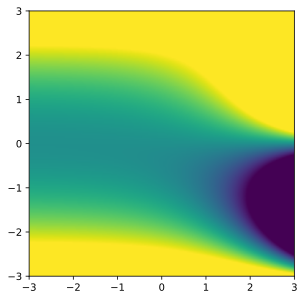

In [363]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = f(x,y)

plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [364]:
# Define the symbols
sx, sy = sym.symbols('sx sy')

# Define the symbolic expression using sympy functions
sZ = (sym.exp(sx)) * sym.sin(sy) + sy**2

# Create functions from the sympy-computed derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

# Evaluate the derivative at a specific point
result_x = df_x(1, 1)
result_y = df_y(1, 1)

print(f"df_x(1, 1) = {result_x}")
print(f"df_y(1, 1) = {result_y}")

df_x(1, 1) = E*sin(1)
df_y(1, 1) = E*cos(1) + 2


In [365]:
df_x(10,10)

exp(10)*sin(10)

In [366]:
# random starting point (uniform between -2 and +2)
localmin = np.array([-1.0,  1.7])
# localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .0800
training_epochs = 150

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0],localmin[1]),
                    df_y(localmin[0],localmin[1])
                  ])
    localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-0.145715868082928 -0.362197009410773]
[-1.   1.7]


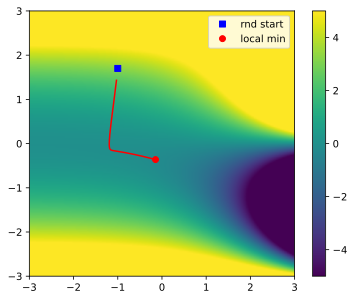

In [367]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

# Programming Assignments

1. Experiment with the values of the learning rate and epochs using a constant value of the initial weights, and describe the results.
2. Experiment with different values of the initial weights at constant values of learning rate and epoch, describe your results.
3. Redo the code to perform Gradient Ascent.